# Assignment_3 SVM

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Part 2: SVM

### Use the following function to plot the classification regions

In [3]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [5]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

In [6]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(X_train, y_train)

from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

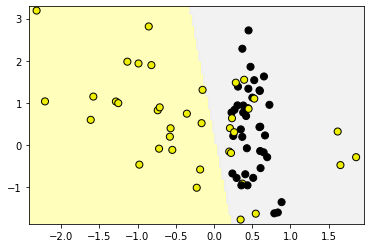

In [7]:
plot_class_regions_for_classifier(clf, X_train, y_train)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

In [8]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

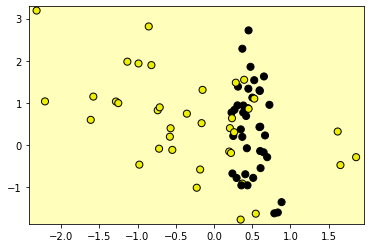

In [9]:
clf1 = SVC(C=0.00001, kernel='linear')
clf1.fit(X_train, y_train)
plot_class_regions_for_classifier(clf1, X_train, y_train)

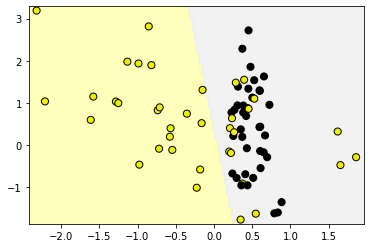

In [10]:
clf2 = SVC(C=100, kernel='linear')
clf2.fit(X_train, y_train)
plot_class_regions_for_classifier(clf2, X_train, y_train)

C: float, default=1.0 ----> Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.  
*https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html*  

**1.** C=0.00001 ----> C is low ----> regularization is high ----> underfitting may occur ----> only 1 class for the data.  
**2.** C=100 ----> C is high ----> regularization is low ----> overfitting may occur ----> 2 classes for the data, classification is present and correct.

### Use the fruits dataset in questions 4, 5, 6.

In [11]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [12]:
# y_fruits = fruits[fruits.columns[:1]]
# X_fruits = fruits[fruits.columns[1:]]

X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

In [13]:
tt = X_fruits[['height','width']]
# X_fruits.drop('mass')
X_train, X_test, y_train, y_test = train_test_split(tt, y_fruits, test_size=0.25, random_state=0)

In [14]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [15]:
print("number of models = ", len(clf.coef_))

number of models =  4


**one-vs-rest approach** ----> 4 classes ----> 4 models

In [16]:
print("models' coefficients:")
clf.coef_

models' coefficients:


array([[-0.27578178,  0.47054165],
       [-1.10790286,  0.78986001],
       [-0.02759899,  0.20469181],
       [ 1.01167376, -1.2616027 ]])

In [17]:
print("models' intercepts:")
clf.intercept_

models' intercepts:


array([-1.49404704,  0.78668967, -1.70769598,  0.37249329])

#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

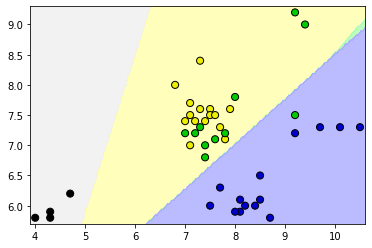

In [18]:
X_modified = np.array(X_train)
plot_class_regions_for_classifier(clf, X_modified, y_train)

from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [19]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [20]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=0)

In [21]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}

grid_clf = GridSearchCV(estimator=clf, param_grid=parameters)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [23]:
from sklearn.svm import SVC

clf = SVC(C=10, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10)

In [24]:
train = clf.score(X_train, y_train)
print("train score = ", train, " ----> accuracy = ", round(train*100, 3), " %")
test = clf.score(X_test, y_test)
print("test score = ", test, " ----> accuracy = ", round(test*100, 3), " %")

train score =  0.9154929577464789  ----> accuracy =  91.549  %
test score =  0.9370629370629371  ----> accuracy =  93.706  %


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

#### Using StandardScaler:

In [25]:
from sklearn import preprocessing

standardScaler = preprocessing.StandardScaler().fit(X_cancer)
X_scaled = standardScaler.transform(X_cancer)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cancer, test_size=0.25, random_state=0)

In [26]:
clf = SVC(C=10, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10)

In [27]:
train = clf.score(X_train, y_train)
print("train score = ", train, " ----> accuracy = ", round(train*100, 3), " %")
test = clf.score(X_test, y_test)
print("test score = ", test, " ----> accuracy = ", round(test*100, 3), " %")

train score =  0.9882629107981221  ----> accuracy =  98.826  %
test score =  0.993006993006993  ----> accuracy =  99.301  %


#### Using MinMaxScaler:

In [28]:
from sklearn import preprocessing

standardScaler = preprocessing.MinMaxScaler().fit(X_cancer)
X_scaled = standardScaler.transform(X_cancer)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cancer, test_size=0.25, random_state=0)

In [29]:
clf = SVC(C=10, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10)

In [30]:
train = clf.score(X_train, y_train)
print("train score = ", train, " ----> accuracy = ", round(train*100, 3), " %")
test = clf.score(X_test, y_test)
print("test score = ", test, " ----> accuracy = ", round(test*100, 3), " %")

train score =  0.9882629107981221  ----> accuracy =  98.826  %
test score =  0.9790209790209791  ----> accuracy =  97.902  %


#### Using Normalizer:

In [31]:
from sklearn import preprocessing

standardScaler = preprocessing.Normalizer().fit(X_cancer)
X_scaled = standardScaler.transform(X_cancer)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cancer, test_size=0.25, random_state=0)

In [32]:
clf = SVC(C=10, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10)

In [33]:
train = clf.score(X_train, y_train)
print("train score = ", train, " ----> accuracy = ", round(train*100, 3), " %")
test = clf.score(X_test, y_test)
print("test score = ", test, " ----> accuracy = ", round(test*100, 3), " %")

train score =  0.9154929577464789  ----> accuracy =  91.549  %
test score =  0.9230769230769231  ----> accuracy =  92.308  %


#### Using OneHotEncoder:

In [34]:
from sklearn import preprocessing

standardScaler = preprocessing.OneHotEncoder().fit(X_cancer)
X_scaled = standardScaler.transform(X_cancer)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cancer, test_size=0.25, random_state=0)

In [35]:
clf = SVC(C=10, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10)

In [36]:
train = clf.score(X_train, y_train)
print("train score = ", train, " ----> accuracy = ", round(train*100, 3), " %")
test = clf.score(X_test, y_test)
print("test score = ", test, " ----> accuracy = ", round(test*100, 3), " %")

train score =  1.0  ----> accuracy =  100.0  %
test score =  0.6293706293706294  ----> accuracy =  62.937  %


#### Using Binarizer:

In [37]:
from sklearn import preprocessing

standardScaler = preprocessing.Binarizer().fit(X_cancer)
X_scaled = standardScaler.transform(X_cancer)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cancer, test_size=0.25, random_state=0)

In [38]:
clf = SVC(C=10, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=10)

In [39]:
train = clf.score(X_train, y_train)
print("train score = ", train, " ----> accuracy = ", round(train*100, 3), " %")
test = clf.score(X_test, y_test)
print("test score = ", test, " ----> accuracy = ", round(test*100, 3), " %")

train score =  0.6267605633802817  ----> accuracy =  62.676  %
test score =  0.6293706293706294  ----> accuracy =  62.937  %


**we can see that:**  
- StandardScaler & MinMaxScaler & Normalizer: produce fine results whether in train or test data.  
- OneHotEncoder: overfitting on train data, poor performance on test data.  
- Binarizer: poor performance on both trian and test data.  